In [1]:
import pandas as pd

In [2]:
salary_df = pd.read_csv('dataset/data.csv')

In [3]:
salary_df.head()

,ID,Years of Experience,Hours per Week,Salary
0,1,1,40,40000
1,2,2,45,45000
2,3,3,50,50000
3,4,4,55,60000
4,5,5,60,65000


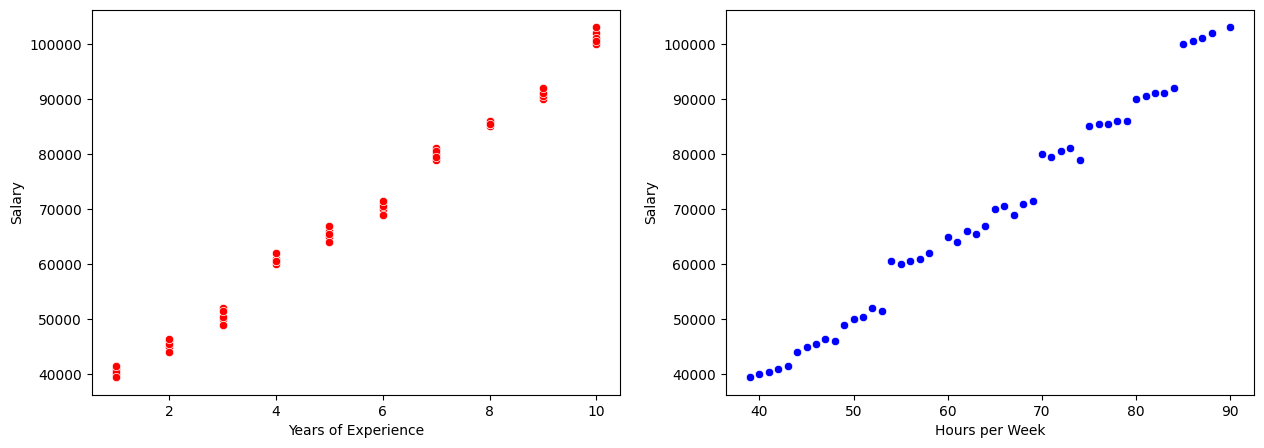

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data = salary_df, x = 'Years of Experience', y = 'Salary', color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.subplot(1,2,2)
sns.scatterplot(data = salary_df, x = 'Hours per Week', y = 'Salary', color = 'blue')
plt.xlabel('Hours per Week')
plt.ylabel('Salary')

plt.show()

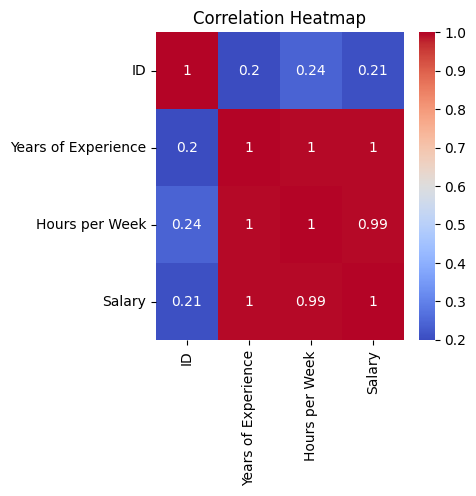

In [5]:
plt.figure(figsize=(4,4))
sns.heatmap(salary_df.corr(), cmap = 'coolwarm', annot = True)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
X = salary_df [['Years of Experience', 'Hours per Week']]
y = salary_df['Salary']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("MSE: ",mse)

MSE:  3140765.318748772


###  MSE because it depends on the scale of the target variable. If your target variable ranges from 0 to 100, an MSE of 10 might be acceptable.
### To interpret MSE easily we can use RMSE which brings the error metric back to the same unit as the target variable. 

In [12]:
print("Max: ", y.max(), " Min: ", y.min())

Max:  103000  Min:  39500


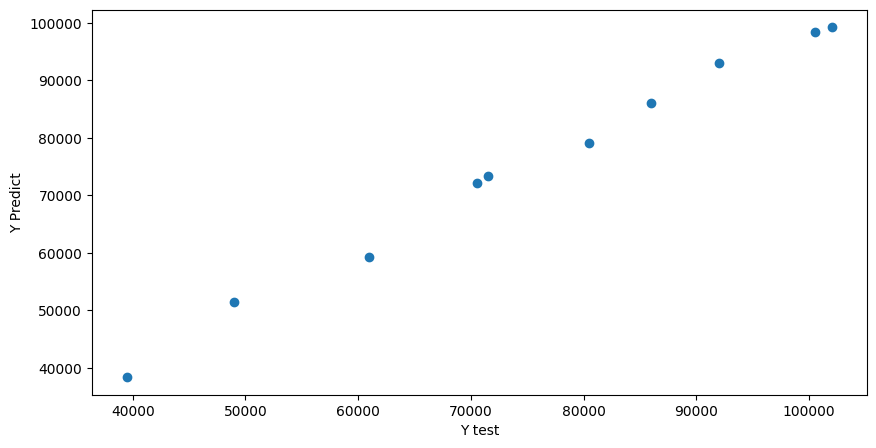

In [13]:
plt.figure(figsize = (10,5))
plt.scatter(x = y_test, y =  y_pred)
plt.xlabel('Y test')
plt.ylabel('Y Predict')
plt.show()

In [14]:
from sklearn.metrics import root_mean_squared_error
rse = root_mean_squared_error(y_pred, y_test)
rse

np.float64(1772.2204486882472)

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_test)
r2

0.9916233953177227

### R² measures how well your model's predictions fit the actual data. R² near to 1 is best. A value of 0 means the model doesn't explain any of the variability.

In [18]:
import pickle

with open ('salary_model.pkl', 'wb') as file:
    pickle.dump(lr, file)